# Modelando faturamento por aeroporto

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings

#warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tools.plotting import autocorrelation_plot

plt.style.use('ggplot')
%matplotlib inline

# Principios do trabalho

A ideia principal do trabalho é usar um artificio estatistico para gerar numeros melhores e mais acertivos para tomada de decião futura.
Foi pensando em usar essa plataforma como uma maneira de atingir a clareza que desejava e expor o que foi feito com riqueza de detalhes.

Não é querendo vomitar passos, que talvez não seja claro em primeiro instante, mas sim, utilizar ferramentas mais avançadas para atingir objetivos e trazer novas abordagens à problemas propostos.

Abordarei com comentários todos os passos para deixar claro os resultados.
Os códigos estão expostos para serem consultados e questionados...

## Iniciando com a base de dados de vendas disponíveis. 
* Consolidei os números de vendas em uma planilha que pode ser consultada

In [343]:
DOOG = pd.read_excel('C:/Users/Guilherme Overney/Dropbox/Clientes/DOOG/BD_DOOG_VENDAS.xlsx',
                    index_col=0)
DOOG.head()

,N_DATE,CGH,SDU,GRU T2,GRU T3,CWB,VIX,BSB,GIG,CFN
DATE,,,,,,,,,,
2018-04-02,SEGUNDA,17420.0,11188.13,6242.0,4458.00,NaN,NaN,NaN,NaN,NaN
2018-04-03,TERÇA,16382.0,8518.01,5404.0,5348.00,NaN,NaN,NaN,NaN,NaN
2018-04-04,QUARTA,16754.0,6980.02,4482.0,4542.01,NaN,NaN,NaN,NaN,NaN
2018-04-05,QUINTA,16570.0,9296.03,5152.0,4590.00,NaN,NaN,NaN,NaN,NaN
2018-04-06,SEXTA,21408.0,10178.04,7982.0,4340.00,NaN,NaN,NaN,NaN,NaN


## Agrupando toda a planilha em totais mensais

In [276]:
DOOG_M = DOOG.resample('M').sum()
DOOG_M

,CGH,SDU,GRU T2,GRU T3,CWB,VIX,BSB,GIG,CFN
DATE,,,,,,,,,
2018-04-30,444140.00,222284.07,153445.99,136434.01,1372.90,9075.00,0.00,0.00,0.0
2018-05-31,434471.00,213022.20,174420.00,131735.00,69013.33,69285.60,0.00,0.00,0.0
2018-06-30,400514.00,194468.06,150704.00,136568.00,57572.14,62780.00,0.00,0.00,0.0
2018-07-31,470812.00,259586.00,191016.00,150516.00,72784.02,70954.00,5378.00,0.00,0.0
2018-08-31,489632.00,255664.00,183458.00,149480.00,64624.00,69434.00,128418.00,52396.00,0.0
2018-09-30,454488.00,246964.00,171272.00,140534.00,67118.00,63844.00,115794.00,96468.00,0.0
2018-10-31,532742.00,240287.00,166392.00,144640.00,62520.00,80364.00,111024.00,96888.00,0.0
2018-11-30,506424.01,249939.09,179276.00,141568.00,69994.00,76314.00,130988.01,98174.00,0.0
2018-12-31,523490.00,254982.65,209928.00,158658.03,72658.00,85202.00,131400.04,114788.00,0.0


## Primeira análise - Análise visual dos dados diários.
* Obejtivo principal é detectar visualmente a estacionariedade.
    * Estacionariedade é uma caracteristica das séries temporais que necessáriamente deve ter para o modelo objetivo do trabalho.
    * Estacionariedade = Média, variância e estrutura de correlação não são função do tempo.
* Cada plot (gráfico), faz referência à uma praça e será assim à base do trabalho todo.

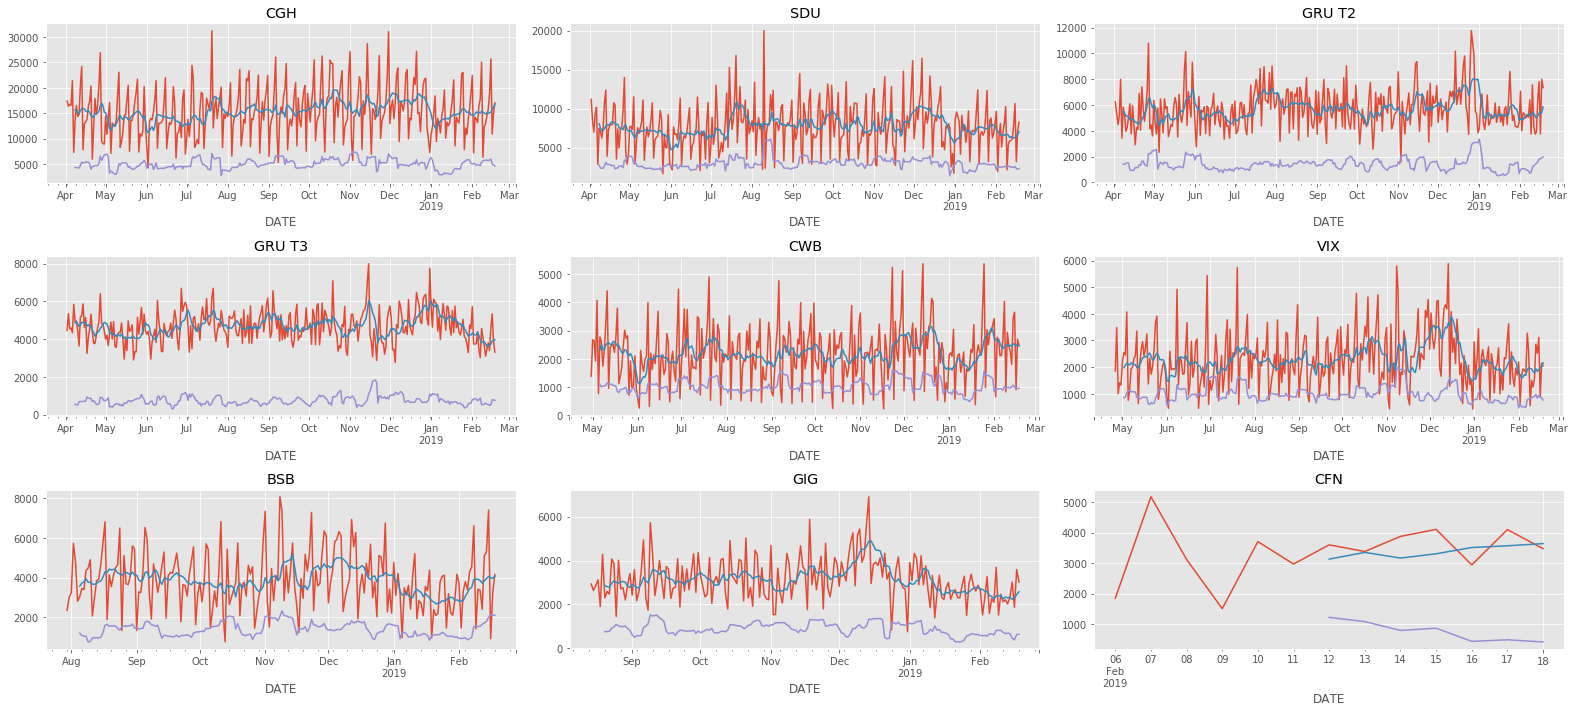

In [192]:
plt.figure(1, figsize=(22, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    DOOG[DOOG.columns[i+1]].plot()
    mov_avg = DOOG[DOOG.columns[i+1]].rolling(window=7).mean()
    mov_std = DOOG[DOOG.columns[i+1]].rolling(window=7).std()
    mov_avg.plot()
    mov_std.plot()
    
    plt.title(DOOG.columns[i+1])

plt.tight_layout()

## Segunda análise - Decomposição das séries de vendas diárias
* Detectar tendencias e sazonalidades dos dados.
* Cada plot é composto por 4 mini gráficos:
    * 1º- Os dados diários observados.
    * 2º- Linha de tendência dos dados.
    * 3º- Sazonalidade percebida
    * 4º- Resultados que não podem ser explicados pela tendência ou sazonalidade.

'CGH'

'SDU'

'GRU T2'

'GRU T3'

'CWB'

'VIX'

'BSB'

'GIG'

'CFN'

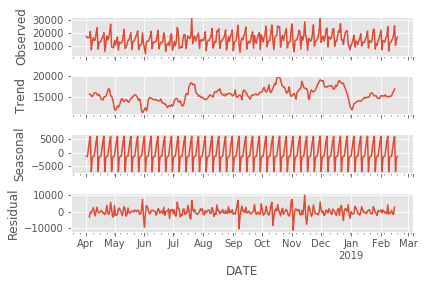

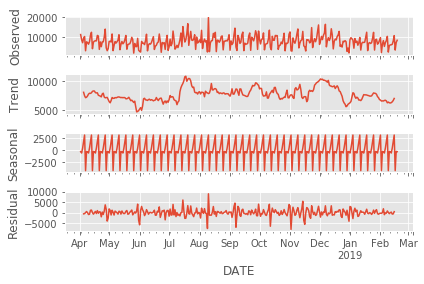

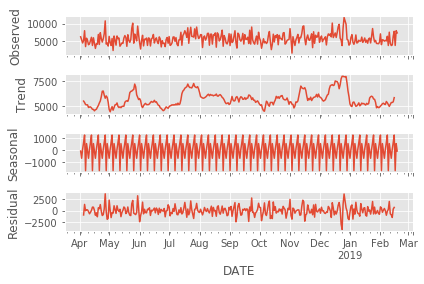

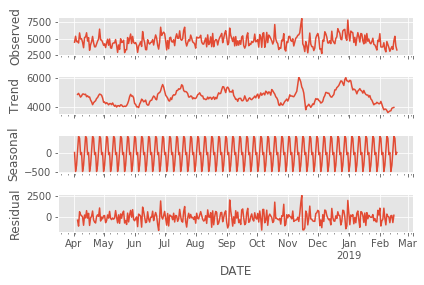

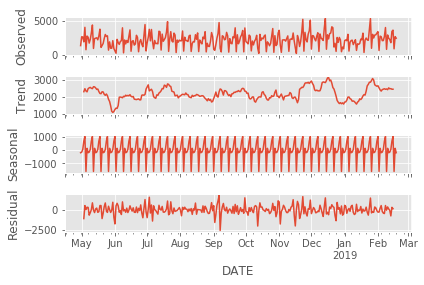

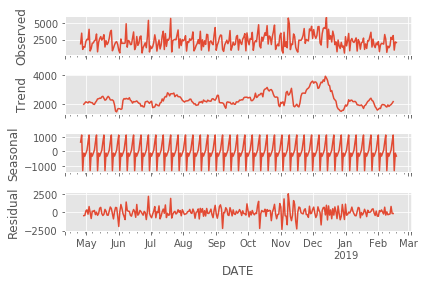

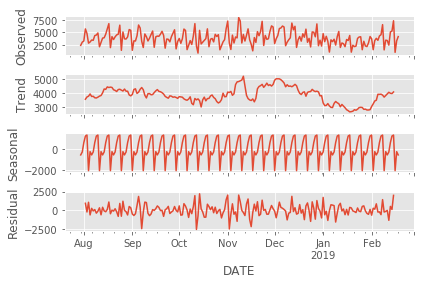

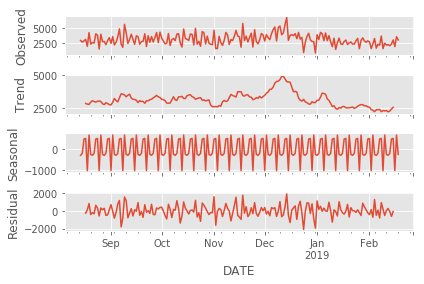

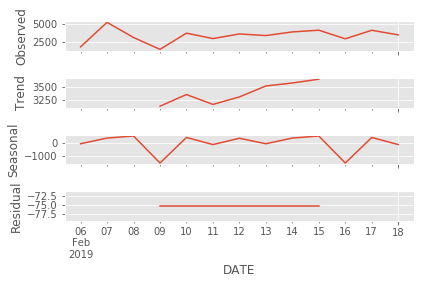

In [196]:
for i in range(9):
    decoposition = seasonal_decompose(DOOG[DOOG.columns[i+1]].dropna(), model ='additive')
    decoposition.plot()
    display(DOOG.columns[i+1])
    
plt.tight_layout()

## Terceira análise - Teste de estacionariedade
* Utilizando o teste aumentado de Dick Fuller podemos "detectar" a estacionariedade dos dados.
* Se p-valor <= 0.05 há estacionariedade 

In [25]:
lista = ['Test Statistic', 'p-value',
        'Number of lags used', 'Observations']
colunas = DOOG.columns[1:]
df = pd.DataFrame(index=lista, columns=colunas)
for i in range(9):
    result = adfuller(DOOG[DOOG.columns[i+1]].dropna(),maxlag=7)
    aux = result[:4]
    df[DOOG.columns[i+1]] = aux
df

,CGH,SDU,GRU T2,GRU T3,CWB,VIX,BSB,GIG,CFN
Test Statistic,-3.970273,-3.943771,-4.592745,-3.708642,-4.062625,-3.799215,-2.876336,-2.672918,-0.000000
p-value,0.001574,0.001735,0.000133,0.003993,0.001116,0.002915,0.048170,0.078843,0.958532
Number of lags used,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Observations,315.000000,315.000000,315.000000,315.000000,287.000000,291.000000,196.000000,181.000000,5.000000


## Quarta análise - Orbservando a autocorrelação e autocorrelação parcial

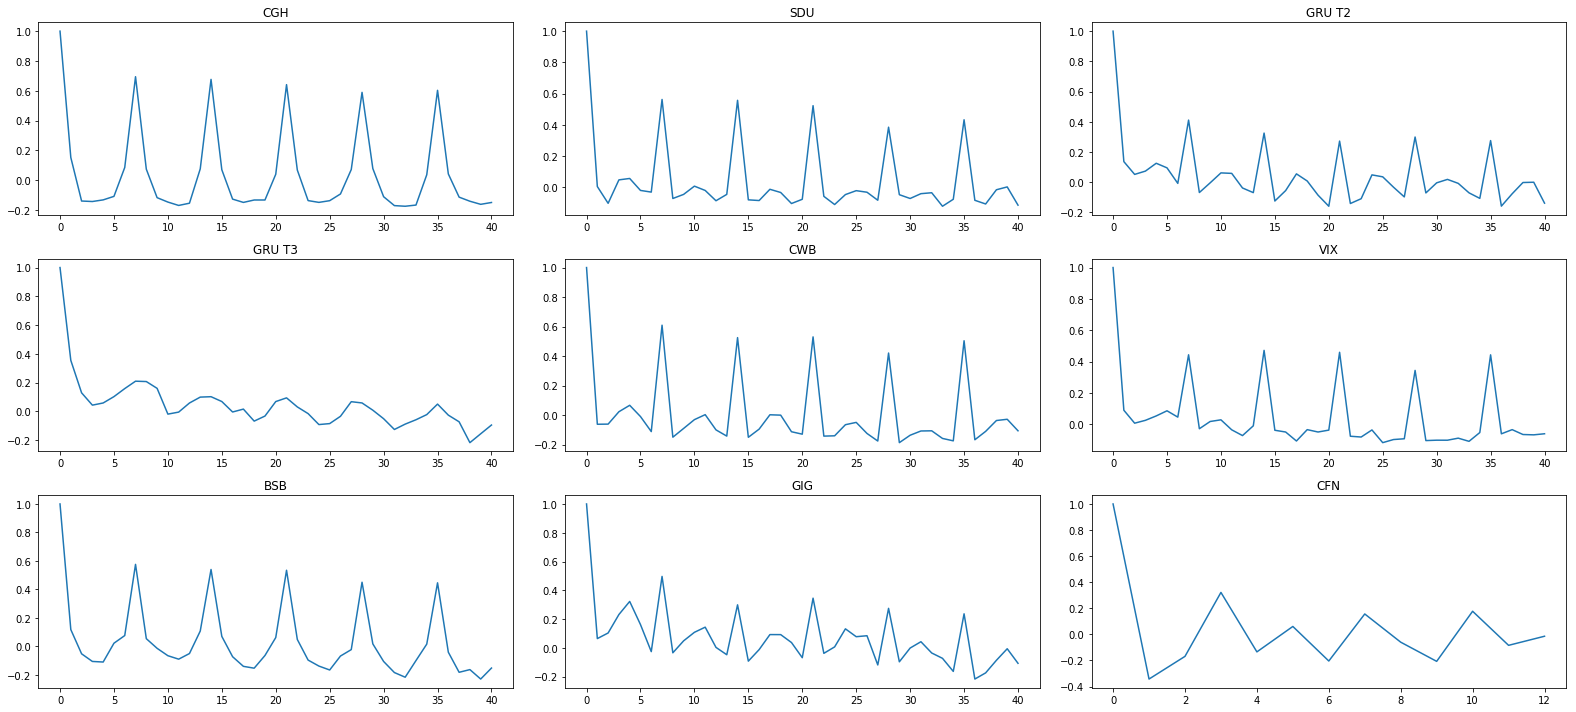

In [39]:
plt.figure(1, figsize=(22, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    acf_x = acf(DOOG[DOOG.columns[i+1]].dropna())
    plt.plot(acf_x)
    plt.title(DOOG.columns[i+1])

plt.tight_layout()

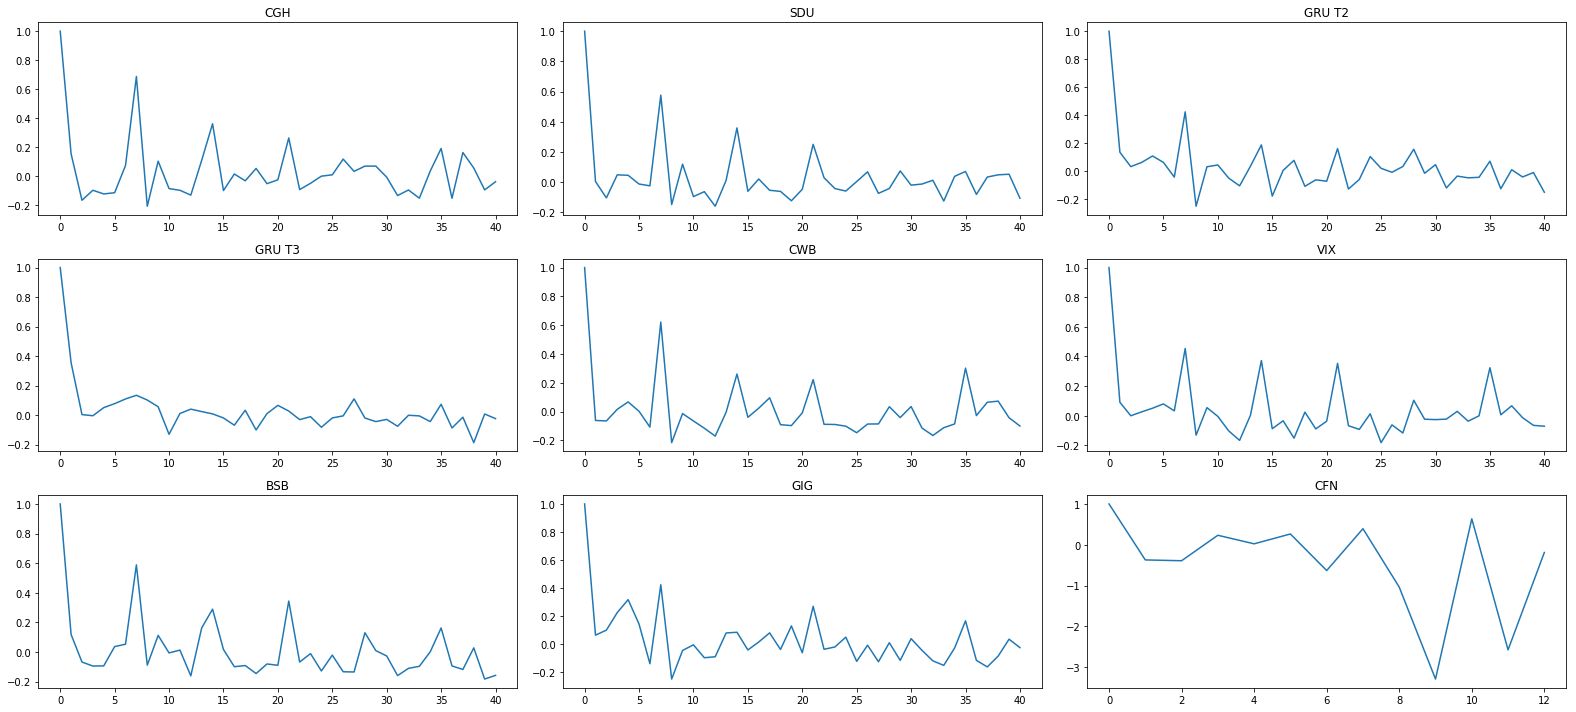

In [40]:
plt.figure(1, figsize=(22, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    pacf_x = pacf(DOOG[DOOG.columns[i+1]].dropna())
    plt.plot(pacf_x)
    plt.title(DOOG.columns[i+1])

plt.tight_layout()

# Iniciando o modelo.

* Para tentarmos modelar os dados diários usaremos o modelo de auto regressão integrado com médias móveis (ARIMA)
* Este modelo usará a observação dos últimos 7 dias e a média móvel de 2 dias para gerar sua previsão.
* Geraremos o modelo e o compararemos com os dados observados para detectar se ele modela bem o que já passou...
* em azul... o modelo e em laranja os dados observados.

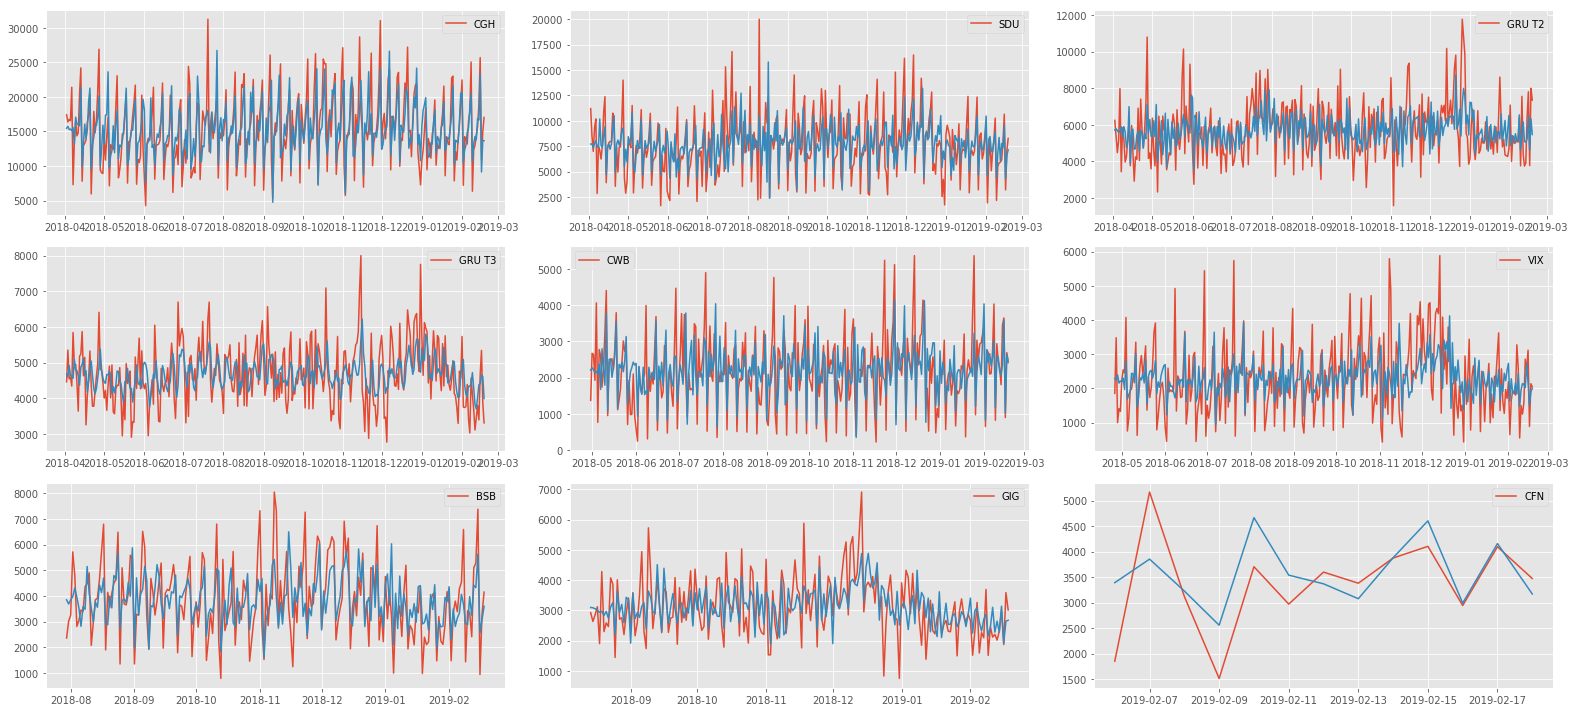

In [231]:
plt.figure(1, figsize=(22, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    model = ARIMA(DOOG[DOOG.columns[i+1]].dropna(), order=(7,0,2), freq ='D')
    h = model.fit()
    plt.plot(DOOG[DOOG.columns[i+1]])
    plt.plot(h.fittedvalues)
        
    plt.legend()

plt.tight_layout()

## Não curti o modelo...

* Para tentar acertar melhor os dados e atacar a sazonalidade percebida, usaremos o modelo ARIMA Sazonal (SARIMAX)
* Esse modelo, de forma análoga, modela os intervalos sazonais e o considera para gerar melhores resultados.

In [232]:
#p = q = range(0,2)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], 0, x[2], 7) for x in list(itertools.product(p, d, q))]

mod = sm.tsa.statespace.SARIMAX(DOOG['CGH'].dropna(),
                                            order=(7,0,2),
                                            seasonal_order=(2,0,2,7),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq='D')
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3775      0.567      0.666      0.506      -0.734       1.489
ar.L2          0.3216      0.630      0.510      0.610      -0.914       1.557
ar.L3         -0.0752      0.207     -0.364      0.716      -0.480       0.330
ar.L4          0.1172      0.157      0.749      0.454      -0.190       0.424
ar.L5          0.0306      0.137      0.224      0.823      -0.238       0.299
ar.L6          0.0095      0.137      0.069      0.945      -0.259       0.278
ar.L7         -0.0723      0.153     -0.471      0.638      -0.373       0.228
ma.L1         -0.0592      0.569     -0.104      0.917      -1.174       1.056
ma.L2         -0.4929      0.584     -0.844      0.399      -1.638       0.652
ar.S.L7        0.7674      1.363      0.563      0.573      -1.904       3.439
ar.S.L14       0.2337      1.365      0.171      0.8

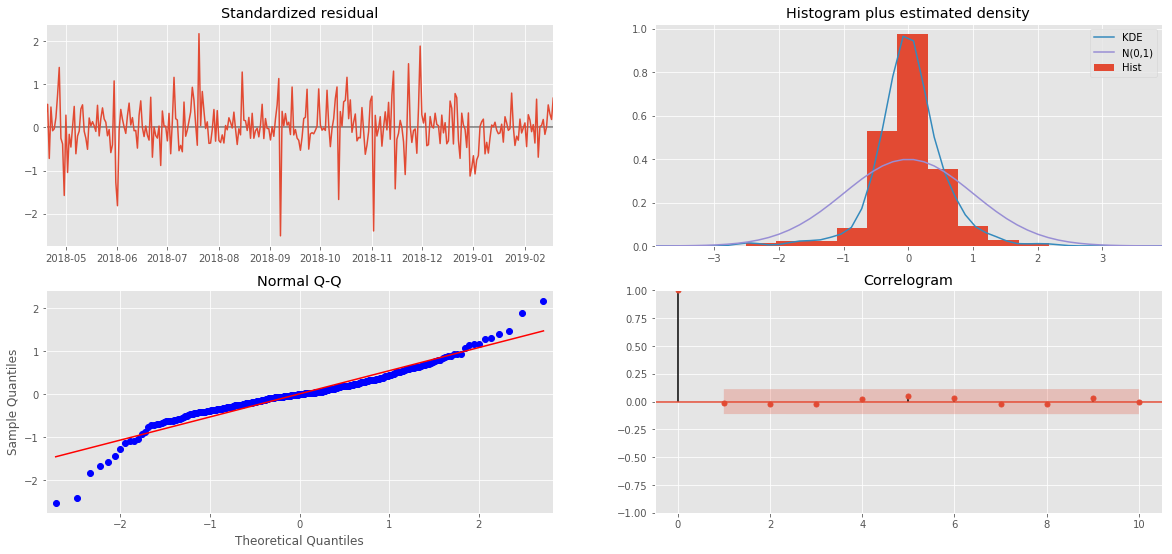

In [228]:
fig = results.plot_diagnostics(figsize=(20,9))

## Testando em congonhas... Destacado

* Notamos melhoras significativas.
* A margem cinza é um intervalo de confiança.

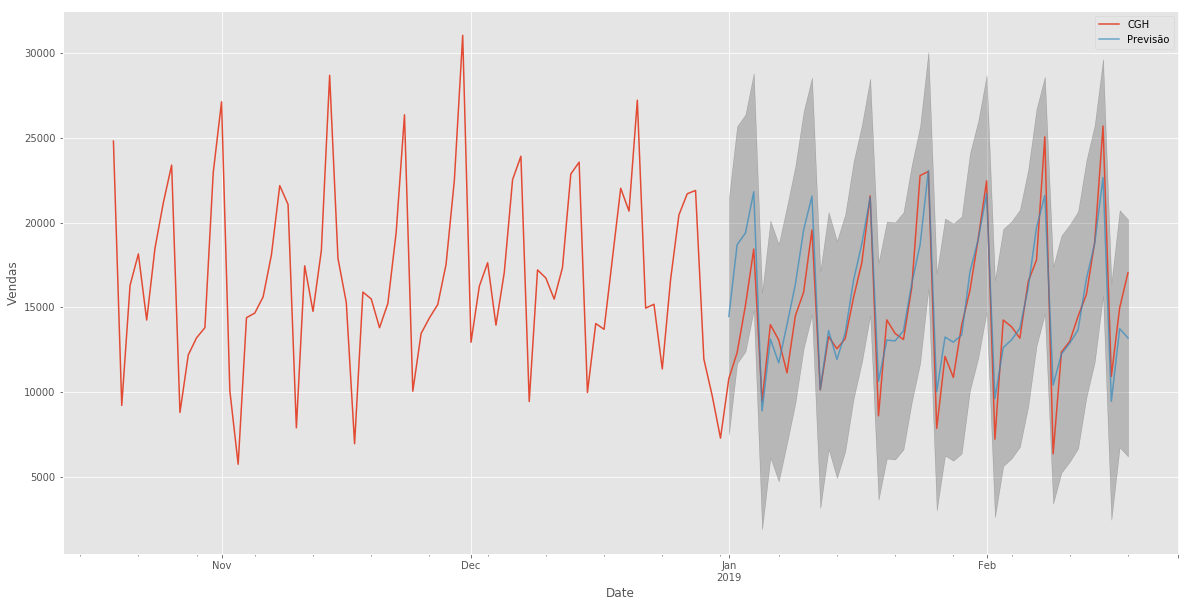

In [278]:
prev = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamixc=False)
prev_interv_conf = prev.conf_int()

ax = DOOG['CGH'][200:].plot(label='CGH', figsize=(20,10))
prev.predicted_mean.plot(ax=ax, label='Previsão', alpha=0.7)

ax.fill_between(prev_interv_conf.index,
               prev_interv_conf.iloc[:,0],
               prev_interv_conf.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Vendas')
plt.legend()

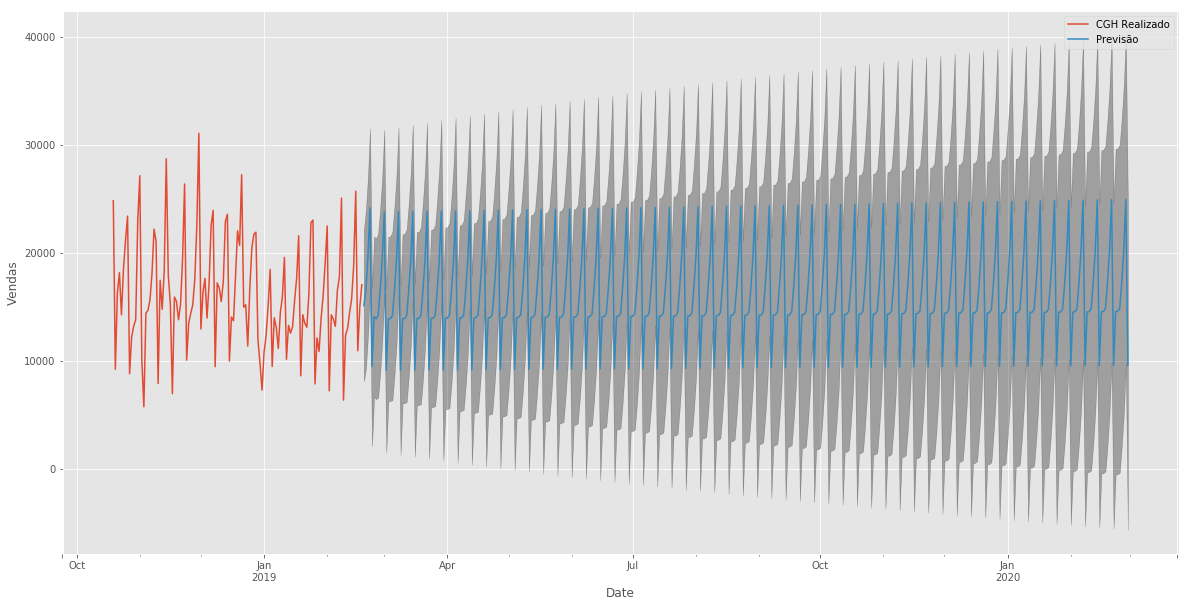

In [274]:
pred_uc = results.get_forecast(steps=376)
pred_ci = pred_uc.conf_int()

ax = DOOG['CGH'][200:].plot(label='CGH Realizado', figsize=(20,10))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Vendas')
plt.legend()

# Vamos aplicar o modelo em todos os aeroportos possíveis

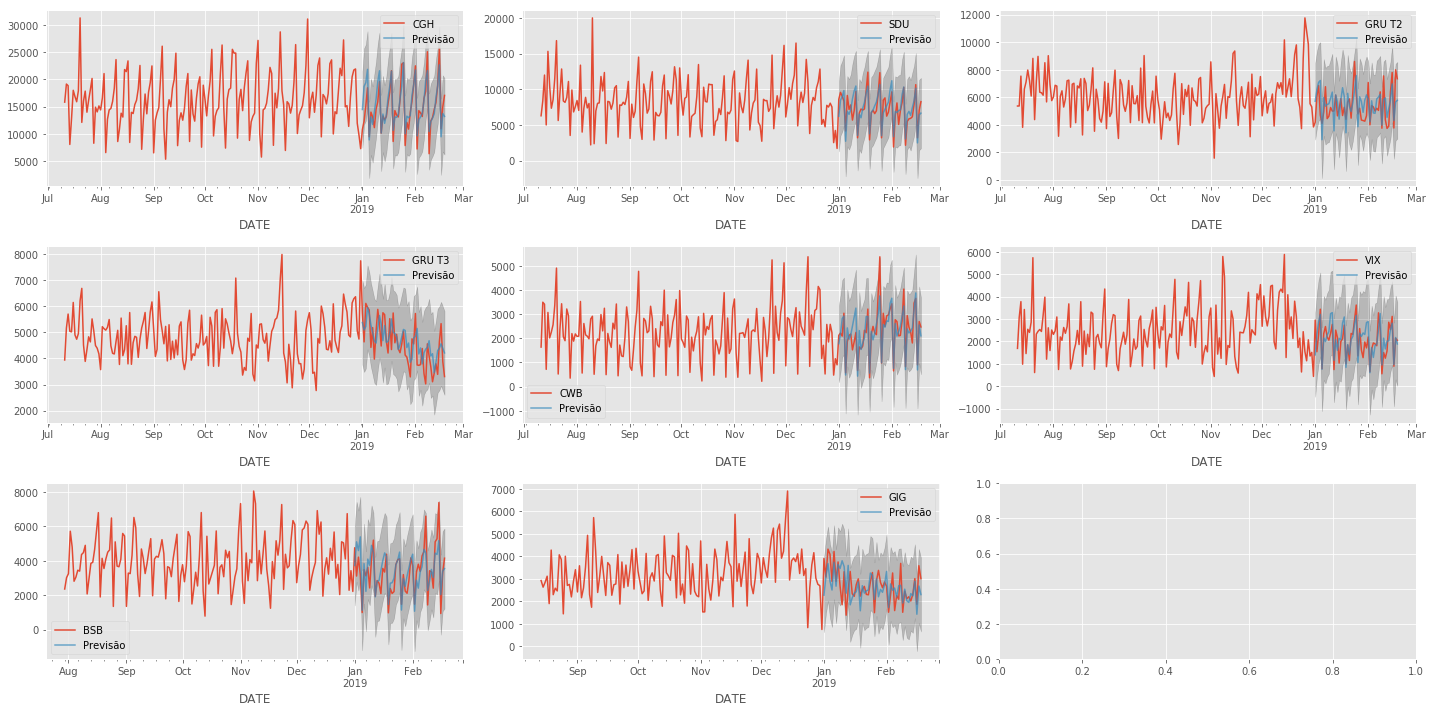

In [328]:
plt.figure(1, figsize=(22, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    try:
        mod = sm.tsa.statespace.SARIMAX(DOOG[DOOG.columns[i+1]].dropna(),
                                            order=(7,0,2),
                                            seasonal_order=(2,0,2,7),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq='D')
        results = mod.fit()
        prev = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
        prev_interv_conf = prev.conf_int()

        ax = DOOG[DOOG.columns[i+1]][100:].plot(label=DOOG.columns[i+1], figsize=(20,10))
        prev.predicted_mean.plot(ax=ax, label='Previsão', alpha=0.7)
        
        ax.fill_between(prev_interv_conf.index,
                       prev_interv_conf.iloc[:,0],
                       prev_interv_conf.iloc[:,1], color='k', alpha=0.2)
        
        plt.legend()
        
        pred_uc = results.get_forecast(steps=376)
        prev_c = pd.DataFrame(pred_uc.predicted_mean, columns=[DOOG.columns[i+1]])            
        if i==0:
            out = prev_c
        else:
            out = pd.concat([out, prev_c],axis=1, sort=False)
                
        
            
        
    except:
        continue
    
plt.tight_layout()   

# Resultados mensais gerados pelo modelo

In [337]:
FINAL = out.resample('M').sum()
FINAL

,CGH,SDU,GRU T2,GRU T3,CWB,VIX,BSB,GIG
2019-02-28,162864.419134,74627.321999,60583.099632,42515.271997,24778.590495,22636.451018,39507.965981,28059.148633
2019-03-31,489627.654942,228162.657460,179761.724896,143117.824958,74649.109464,66634.291802,112386.309643,75193.828071
2019-04-30,472824.660276,221276.052723,172443.244431,138841.256318,73555.067767,63396.619232,105106.186124,62011.469575
2019-05-31,506529.718251,234287.086350,180573.787644,144163.250721,79728.204003,66558.249096,109950.461577,57326.863639
2019-06-30,471543.594136,216781.023296,171619.082105,139562.517878,74869.005891,60891.942454,99377.084152,48857.301877
2019-07-31,495320.460810,228121.206152,177674.495027,143058.678359,80145.697093,62856.209277,102537.091227,45126.920279
2019-08-31,505217.601243,229100.456062,178293.262865,144662.542113,82075.633778,62551.581781,101095.985670,40500.981166
2019-09-30,482203.203324,220168.402466,172491.840017,139026.093827,80615.096985,59018.542642,94738.174097,35157.934686
2019-10-31,506948.871400,229120.939980,177843.772827,142948.820239,85559.149492,61002.138145,97646.651912,32332.881990
2019-11-30,491411.760546,219309.485118,171299.627843,139783.047273,82858.198674,57455.166766,91206.020752,27908.320184


# Resultado do faturameto anual (exceto CFN)
* O modelo apenas preveu o futuro - 19/02 para frente.
* Até 18/02 são dados reais... 
* Faturamento de 2019 sem CFN = 18.320.448,47
* Para atingir a meta de 22 Mi. em 2019, CFN necessitaria faturar 4 Mi.

Obrigado!

In [344]:
FINAL.sum().sum() + 2073491 #Faturamento de janeiro sem Confins...

18320448.468976494